<a href="https://colab.research.google.com/github/wolfisberg/zhaw-ba-online/blob/main/crepe_offline/crepe_binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def convert_hz_to_cent(f,fref=10.0):
    return 1200.0*np.log2(f/fref)

def convert_cent_to_hz(c,fref=10.0):
    return fref*2**(c/1200.0)

def calc_bin(freq, cents_per_bin = 20, lower_bound_freq=32.7):
    return (convert_hz_to_cent(freq)-convert_hz_to_cent(lower_bound_freq))/cents_per_bin

def calc_y(f_groundtruth, n_bins = 360):
    c_true = calc_bin(f_groundtruth)
    return create_bin_vector(c_true)

def create_bin_vector(c_true):
    cis = np.arange(360)
    y = gaussian_blur(cis, c_true)
    return y
    
def gaussian_blur(ci, ctrue):
    return np.exp(-(ci-ctrue)**2/(2.0*25.0**2))
    

Text(123, 0.9998309637687114, 'max=1.0 @ bin 113')

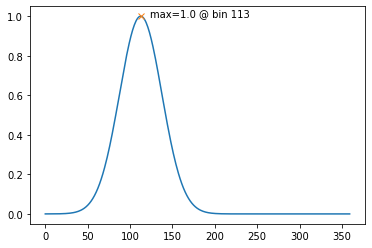

In [7]:
f_groundtruth = np.array([120.0])
y = calc_y(f_groundtruth)
# print(y)
plt.figure()
plt.plot(y)
plt.plot(np.argmax(y),np.max(y),'x')
plt.text(np.argmax(y)+10,np.max(y),f'max={np.max(y):.1f} @ bin {np.argmax(y)}')